<a href="https://colab.research.google.com/github/samitha093/Image-processing-Assigment2/blob/main/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1) Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

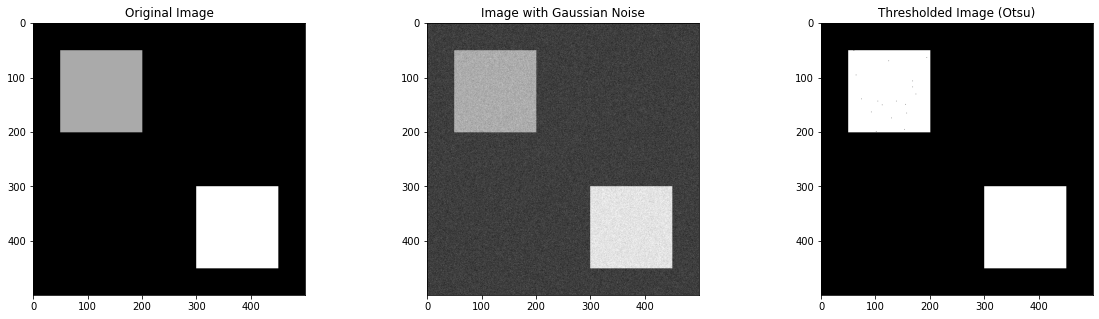

In [ ]:
#genarate image
img = np.zeros((500, 500), dtype=np.uint8)
img[50:201, 50:201] = 100
img[300:451, 300:451] = 150

# add Gaussian noise
sigma = np.sqrt(130)
noise = np.random.normal(80, sigma, size=img.shape)
img_with_noise = img.astype(np.float64) + noise
img_with_noise = np.clip(img_with_noise, 0, 255).astype(np.uint8)

# apply Otsu's thresholding to the image with noise
threshold_value, threshold_image = cv2.threshold(img_with_noise, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot the original image, image with noise, and thresholded image
plt.gray()
f, arr = plt.subplots(1, 3, figsize=(20, 5))
arr[0].imshow(img)
arr[0].set_title('Original Image')
arr[1].imshow(img_with_noise)
arr[1].set_title('Image with Gaussian Noise')
arr[2].imshow(threshold_image)
arr[2].set_title('Thresholded Image (Otsu)')

plt.show()

### Q2) Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

In [1]:
import numpy as np
from skimage import io, data
import matplotlib.pyplot as plt
import sys

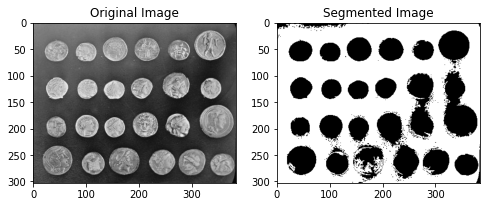

In [4]:
# Increase the recursion depth limit to 10,000 (default is 1,000)
sys.setrecursionlimit(10000)

def region_growing(image, seed, thresh):
    mask = np.zeros_like(image)
    mask[seed] = 1

    min_thresh = image[seed] - thresh
    max_thresh = image[seed] + thresh

    queue = [seed]
    while queue:
        pixel = queue.pop(0)
        x, y = pixel[0], pixel[1]
        neighbors = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
        for neighbor in neighbors:
            if (neighbor[0] >= 0 and neighbor[0] < image.shape[0] and 
                neighbor[1] >= 0 and neighbor[1] < image.shape[1] and 
                not mask[neighbor]):
                if (image[neighbor] >= min_thresh and image[neighbor] <= max_thresh):
                    mask[neighbor] = 1
                    queue.append(neighbor)

    return mask

# Load the example image from scikit-image
image = data.coins()

# Select a seed point inside the foreground object
seed = (100, 100)

# Set the threshold for pixel similarity
thresh = 50

# Segment the image using the region-growing technique
mask = region_growing(image, seed, thresh)
mask = mask.astype(np.uint8)

# Visualize the results
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Segmented Image')
plt.show()
